In [106]:
import pandas as pd
import numpy as np
import re

In [107]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [108]:
pd.set_option('display.max_columns', None)

In [109]:
df = pd.read_csv('Data_visualization_df.csv')



In [110]:
df = df[df['Super Built-up Area'] <= 40000]

In [111]:
df.duplicated().sum()

0

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12443 entries, 0 to 12443
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                12443 non-null  int64  
 1   Facing                    12443 non-null  object 
 2   No_Bedroom                12443 non-null  int64  
 3   No_Bathroom               12443 non-null  float64
 4   No_Balcony                12443 non-null  object 
 5   Corner_Property           12443 non-null  object 
 6   Furnishing                12443 non-null  object 
 7   Features                  12443 non-null  object 
 8   Price_in_Crore            12443 non-null  float64
 9   price_Per_Sqft_converted  12443 non-null  float64
 10  flat_age                  12443 non-null  object 
 11  sector_num                12443 non-null  int64  
 12  Super Built-up Area       12443 non-null  float64
 13  floor_category            12442 non-null  object 
dtypes: float64(

In [113]:
df = df.drop(columns = [  'Unnamed: 0'])


In [114]:
df.sample(3)

Facing  No_Bedroom  No_Bathroom No_Balcony Corner_Property  \
10502  North-West           4          5.0         3+             Yes   
6563   North-East           3          3.0          2              No   
420         North           2          2.0          1              No   

          Furnishing                                           Features  \
10502  Semifurnished  ['Security / Fire Alarm', 'Power Back-up', 'Fe...   
6563     Unfurnished  ['Lift(s)', 'Swimming Pool', 'Park', 'Fitness ...   
420    Semifurnished  ['Security / Fire Alarm', 'Power Back-up', 'Fe...   

       Price_in_Crore  price_Per_Sqft_converted            flat_age  \
10502            1.76                    7500.0        New Property   
6563             2.61                   23966.0  Under Construction   
420              0.75                    9375.0      Relatively New   

       sector_num  Super Built-up Area floor_category  
10502          99               2352.0            Low  
6563           83               1850.0            Low  
420            67                800.0           High

In [115]:
df['sector_num'].nunique()

89

In [116]:
co = pd.read_csv("latlong.csv")

In [117]:
co

sector             coordinates
0       sector 1  28.3663° N, 76.9456° E
1       sector 2  28.5095° N, 77.0320° E
2       sector 3  28.4909° N, 77.0176° E
3       sector 4  28.4738° N, 77.0107° E
4       sector 5  28.4794° N, 77.0176° E
..           ...                     ...
124   sector 113  28.5287° N, 77.0233° E
125   sector 114  28.5334° N, 77.0118° E
126   sector 115  28.5385° N, 77.0061° E
127  gwal pahari  28.4484° N, 77.0210° E
128      manesar  28.3515° N, 76.9428° E

[129 rows x 2 columns]

In [118]:
co['sector_no'] = co['sector'].str.extract(r'(\d+\w*)')  
co[['latitude', 'longitude']] = co['coordinates'].str.extract(r'([\d.]+)° N, ([\d.]+)° E')
co = co.drop(columns=['sector', 'coordinates'])

In [119]:
co = co.dropna()

In [120]:
co.shape

(127, 3)

In [121]:
co['sector_num'] = co['sector_no'].str.extract(r'(\d+)')

In [122]:
co['sector_num'].nunique()

115

In [123]:
co['latitude'] = pd.to_numeric(co['latitude'], errors='coerce')
co['longitude'] = pd.to_numeric(co['longitude'], errors='coerce')

In [124]:
co = co.groupby('sector_num', as_index=False).agg({
    'latitude': 'mean',
    'longitude': 'mean'
})

In [125]:
co.sample(4)

sector_num  latitude  longitude
106         91   28.4014    76.9225
4          102   28.4750    76.9715
81          69   28.3966    77.0341
47          38   28.4347    77.0430

In [126]:
df.sample(2)

Facing  No_Bedroom  No_Bathroom No_Balcony Corner_Property  \
5710        East           3          3.0          3             Yes   
1771  North-East           2          2.0          2              No   

         Furnishing                                           Features  \
5710  Semifurnished  ['Power Back-up', 'Feng Shui / Vaastu Complian...   
1771    Unfurnished  ['Security / Fire Alarm', 'Feng Shui / Vaastu ...   

      Price_in_Crore  price_Per_Sqft_converted      flat_age  sector_num  \
5710            1.50                   11494.0  New Property          37   
1771            0.68                   10707.0  New Property          76   

      Super Built-up Area floor_category  
5710               1566.0           High  
1771                882.0           High

In [127]:
df['sector_num'] = df['sector_num'].astype(str)
co['sector_num'] = co['sector_num'].astype(str)
merged_df = pd.merge(df, co , on='sector_num', how='inner')

In [128]:
merged_df.isna().sum()

Facing                      0
No_Bedroom                  0
No_Bathroom                 0
No_Balcony                  0
Corner_Property             0
Furnishing                  0
Features                    0
Price_in_Crore              0
price_Per_Sqft_converted    0
flat_age                    0
sector_num                  0
Super Built-up Area         0
floor_category              1
latitude                    0
longitude                   0
dtype: int64

In [129]:
merged_df.sample(4)

Facing  No_Bedroom  No_Bathroom No_Balcony Corner_Property  \
4952         East           3          3.0          3             Yes   
9723         East           3          5.0          3             Yes   
8979         West           4          4.0         3+              No   
12091  North-East           2          2.0          2              No   

          Furnishing                                           Features  \
4952   Semifurnished  ['Lift(s)', 'Swimming Pool', 'Park', 'Internet...   
9723   Semifurnished  ['Water purifier', 'Centrally Air Conditioned'...   
8979   Semifurnished  ['Private Garden / Terrace', 'Lift(s)', 'Centr...   
12091  Semifurnished  ['Feng Shui / Vaastu Compliant', 'Intercom Fac...   

       Price_in_Crore  price_Per_Sqft_converted            flat_age  \
4952             1.70                   11111.0  Under Construction   
9723             2.46                   10933.0      Relatively New   
8979             3.68                   22857.0  Under Construction   
12091            0.45                    6741.0      Relatively New   

      sector_num  Super Built-up Area floor_category  latitude  longitude  
4952          93               2065.5            Low   28.4153    76.9326  
9723          69               3037.5            Low   28.3966    77.0341  
8979         113               2298.0            Mid   28.5287    77.0233  
12091         47                623.0            Mid   28.4276    77.0492

In [130]:
numeric_columns = ['Price_in_Crore', 'price_Per_Sqft_converted', 'Super Built-up Area', 'latitude', 'longitude']

group_df = merged_df.groupby('sector_num')[numeric_columns].mean()

In [131]:
group_df.sort_values(by = 'Price_in_Crore')

Price_in_Crore  price_Per_Sqft_converted  Super Built-up Area  \
sector_num                                                                  
6                 0.420000               6942.000000           816.750000   
4                 0.490000               4359.000000          1124.000000   
46                0.800000               5673.000000          1410.000000   
35                0.828750               8564.000000          1097.943750   
1                 1.155455               6664.454545          1911.581818   
...                    ...                       ...                  ...   
30                6.924062              20301.531250          3667.965625   
53                7.287320              23340.196078          3464.381373   
24                8.619444              16890.296296          5036.524074   
54               10.325712              32638.104247          3350.403475   
42               38.551688              59304.103896          6567.342208   

            latitude  longitude  
sector_num                       
6            28.4745    77.0262  
4            28.4738    77.0107  
46           28.4374    77.0586  
35           28.4155    77.0022  
1            28.3663    76.9456  
...              ...        ...  
30           28.4604    77.0579  
53           28.4433    77.0948  
24           28.4939    77.1038  
54           28.4348    77.1089  
42           28.4576    77.1020  

[89 rows x 5 columns]

In [132]:
px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_Per_Sqft_converted", size='Super Built-up Area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)


In [133]:
merged_df.to_csv('data_viz1.csv',index=False)

In [134]:
wordcloud_df = merged_df[['Features' , 'sector_num']]

In [135]:
wordcloud_df

Features sector_num
0      ['Security / Fire Alarm', 'Feng Shui / Vaastu ...         90
1      ['Security / Fire Alarm', 'Feng Shui / Vaastu ...         90
2      ['Security / Fire Alarm', 'Feng Shui / Vaastu ...         70
3      ['Power Back-up', 'Security / Fire Alarm', 'In...         68
4      ['Power Back-up', 'Intercom Facility', 'Lift(s...        107
...                                                  ...        ...
12438  ['Security / Fire Alarm', 'Power Back-up', 'Fe...         82
12439  ['Power Back-up', 'Feng Shui / Vaastu Complian...         49
12440  ['Centrally Air Conditioned', 'Water purifier'...         68
12441  ['Centrally Air Conditioned', 'Security / Fire...         49
12442  ['Security / Fire Alarm', 'Feng Shui / Vaastu ...         43

[12443 rows x 2 columns]

In [136]:
import ast
main = []
for item in wordcloud_df['Features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [137]:
main

['Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'No open drainage around',
 'Recently Renovated',
 'Bank Attached Property',
 'Visitor Parking',
 'Park',
 'Natural Light',
 'Airy Rooms',
 'Internet/wi-fi connectivity',
 'Shopping Centre',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Water softening plant',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'No open drainage around',
 'Bank Attached Property',
 'Visitor Parking',
 'Park',
 'Natural Light',
 'Airy Rooms',
 'Internet/wi-fi connectivity',
 'Shopping Centre',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Piped-gas',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Internet/wi-fi connectivity',
 'S

In [138]:
from wordcloud import WordCloud

In [139]:
feature_text = ' '.join(main)

In [140]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [141]:
feature_text

'Security / Fire Alarm Feng Shui / Vaastu Compliant Lift(s) Maintenance Staff Water Storage No open drainage around Recently Renovated Bank Attached Property Visitor Parking Park Natural Light Airy Rooms Internet/wi-fi connectivity Shopping Centre Rain Water Harvesting Club house / Community Center Water softening plant Security / Fire Alarm Feng Shui / Vaastu Compliant Lift(s) Maintenance Staff Water Storage No open drainage around Bank Attached Property Visitor Parking Park Natural Light Airy Rooms Internet/wi-fi connectivity Shopping Centre Waste Disposal Rain Water Harvesting Club house / Community Center Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Water Storage Piped-gas Visitor Parking Swimming Pool Park Security Personnel Internet/wi-fi connectivity Shopping Centre Fitness Centre / GYM Rain Water Harvesting Club house / Community Center Water softening plant Power Back-up Security / Fire Alarm Intercom Facility Lift(s) Swimming 

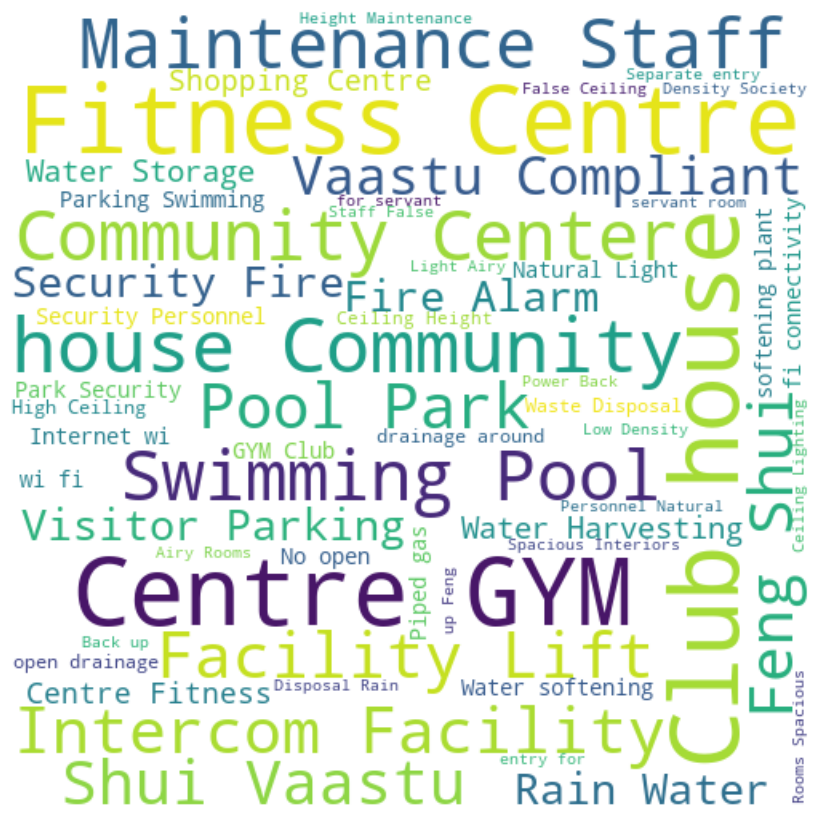

In [142]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 500, height = 500, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [143]:
df.columns

Index(['Facing', 'No_Bedroom', 'No_Bathroom', 'No_Balcony', 'Corner_Property',
       'Furnishing', 'Features', 'Price_in_Crore', 'price_Per_Sqft_converted',
       'flat_age', 'sector_num', 'Super Built-up Area', 'floor_category'],
      dtype='object')

In [144]:
fig = px.scatter(df, x="Super Built-up Area", y="Price_in_Crore", color="No_Bedroom", title="Area Vs Price")

fig.show()

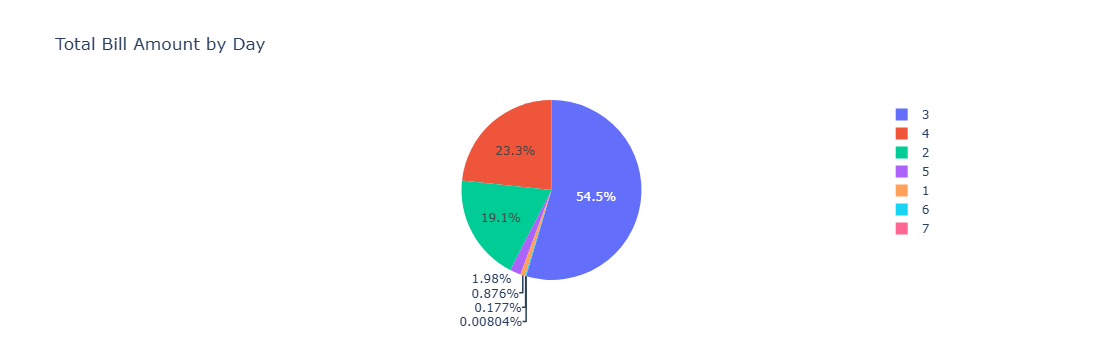

In [145]:
fig = px.pie(df, names='No_Bedroom', title='Total Bil Amount by Day')

fig.show()